In [1]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
from sklearn.naive_bayes import BernoulliNB
b=BernoulliNB()
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from xgboost import XGBClassifier
xbgc=XGBClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df1=pd.read_csv('train.csv')

In [4]:
df1.shape

(891, 12)

In [5]:
df2=pd.read_csv('test.csv')

In [6]:
df2.shape

(418, 11)

In [7]:
df=df1.append(df2)

In [8]:
df.shape

(1309, 12)

In [9]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
315,1207,NaN,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q
787,788,0.0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
627,628,1.0,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
172,1064,NaN,3,"Dyker, Mr. Adolf Fredrik",male,23.0,1,0,347072,13.9000,NaN,S
625,626,0.0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
255,1147,NaN,3,"MacKay, Mr. George William",male,NaN,0,0,C.A. 42795,7.5500,NaN,S
614,615,0.0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
397,1289,NaN,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C
801,802,1.0,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
348,349,1.0,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

###  We normalized

In [13]:
df.Embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

### We extracted the expression we wanted from the string. 

In [14]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False) 
# Let the letters come after the space, move to the dot and pull this part

In [15]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [16]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Dr','Major','Col','Sir','Rev','Jonkheer','Capt','Don'],'Mr')

In [17]:
df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

#### We define it as 1 if the age is older than 70 and 0 if it is younger.

In [18]:
df['Senior']=df['Age'].map(lambda s:1 if s>70 else 0)

In [19]:
df['Senior']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Senior, Length: 1309, dtype: int64

In [20]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.004584
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.067573
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [22]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Senior            0
dtype: int64

### We grouped the Data Frame by Title, took the median of the Age, and filled in the empty age columns.

In [23]:
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'),inplace=True)
# df.groupby('Title')['Age'].transform('median')

In [24]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
413    30.0
414    39.0
415    38.5
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Senior       1309 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [26]:
# Since the cabin has no effect on the data set, we discard it.
del df['Cabin']

In [27]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [28]:
df['Family']=df['SibSp']+df['Parch']+1

In [29]:
df['Family'].value_counts()
#df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

<AxesSubplot:>

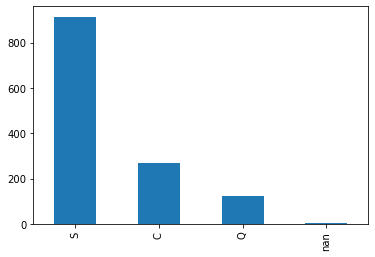

In [30]:
df.Embarked.value_counts(dropna=False).plot(kind='bar')

In [31]:
df['Embarked']=df['Embarked'].fillna('C')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

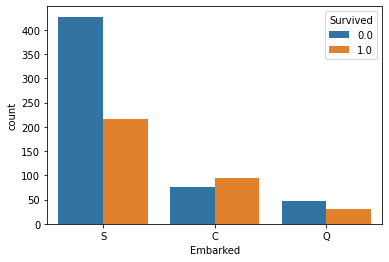

In [32]:
sns.countplot(x='Embarked',hue='Survived',data=df)

<AxesSubplot:ylabel='Frequency'>

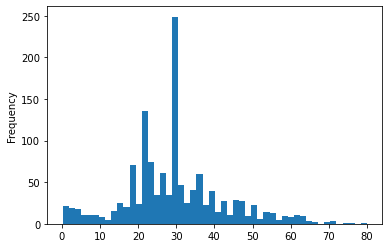

In [33]:
df.Age.plot(kind='hist',bins=50)

In [34]:
df['Single']=df.Family<2
df['Small']=(df.Family>1)&(df.Family<5)
df['Medium']=(df.Family>4)&(df.Family<7)
df['Large']=df.Family>6

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

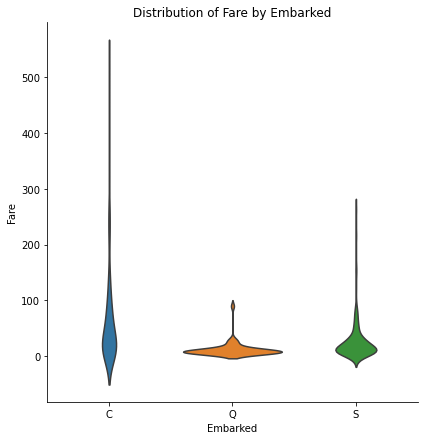

In [35]:
sns.catplot(x='Embarked',y='Fare',kind='violin',inner=None,data=df,height=6,order=['C','Q','S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout

In [36]:
del df['Name']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
 10  Title        1309 non-null   object 
 11  Senior       1309 non-null   int64  
 12  Family       1309 non-null   int64  
 13  Single       1309 non-null   bool   
 14  Small        1309 non-null   bool   
 15  Medium       1309 non-null   bool   
 16  Large        1309 non-null   bool   
dtypes: bool(4), float64(3), int64(6), object(4)
memory usage: 180.6+ KB


In [38]:
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [39]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [40]:
df_dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,False,True,False,False,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,False,True,False,False,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,True,False,False,False,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,False,True,False,False,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0
414,NaN,1,39.0,0,0,108.9000,0,1,True,False,False,False,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,0,1,True,False,False,False,1,0,1,0,1,0
416,NaN,3,30.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0


In [41]:
df_train=df_dummies[:891]
df_test=df_dummies[891:]

In [42]:
df_train.shape,df_test.shape

((891, 18), (418, 18))

In [43]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,False,True,False,False,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,False,True,False,False,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,True,False,False,False,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,False,True,False,False,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0


In [44]:
del df_train['Survived']

In [45]:
y=df1['Survived']

In [46]:
algorithms = [g,b,k,log,d,r,gbc]
names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic', 'Single Tree', 'Random Forest', 'Gradient Boost']

In [47]:
def algo_test (x, y, algorithms, names):
    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x, y)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        if accuracy_score(y, algorithms[i].predict(x)) == 1:
            accuracy.append(0)
        else:   
            accuracy.append(accuracy_score(y, algorithms[i].predict(x)))
        if precision_score(y, algorithms[i].predict(x)) == 1:
            precision.append(0)
        else:   
            precision.append(accuracy_score(y, algorithms[i].predict(x)))
        if recall_score(y, algorithms[i].predict(x)) == 1:
            recall.append(0)
        else:   
            recall.append(accuracy_score(y, algorithms[i].predict(x)))
        if f1_score(y, algorithms[i].predict(x)) == 1:
            f1.append(0)
        else:   
            f1.append(accuracy_score(y, algorithms[i].predict(x)))
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('Accuracy', ascending = False)

In [48]:
algo_test(df_train,y,algorithms,names)

,Accuracy,Precision,Recall,F1
Single Tree,0.979798,0.979798,0.979798,0.979798
Random Forest,0.979798,0.979798,0.979798,0.979798
Gradient Boost,0.893378,0.893378,0.893378,0.893378
Logistic,0.831650,0.831650,0.831650,0.831650
GaussianNB,0.820426,0.820426,0.820426,0.820426
K Nearest,0.818182,0.818182,0.818182,0.818182
BernoulliNB,0.810325,0.810325,0.810325,0.810325


In [49]:
df_test.shape

(418, 18)

In [50]:
df_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,0,1,True,False,False,False,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,0,2,False,True,False,False,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,0,1,True,False,False,False,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,0,1,True,False,False,False,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,0,3,False,True,False,False,0,0,1,0,0,1


In [51]:
del df_test['Survived']

In [52]:
d.fit(df_train,y)

DecisionTreeClassifier()

In [53]:
tahmin=d.predict(df_test)

In [54]:
tahmin

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [55]:
df_test.head(418)

,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,0,1,True,False,False,False,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,0,2,False,True,False,False,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,True,False,False,False,1,1,0,0,1,0
3,3,27.0,0,0,8.6625,0,1,True,False,False,False,1,0,1,0,1,0
4,3,22.0,1,1,12.2875,0,3,False,True,False,False,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0
414,1,39.0,0,0,108.9000,0,1,True,False,False,False,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,0,1,True,False,False,False,1,0,1,0,1,0
416,3,30.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0


In [56]:
sonuc=df2[['PassengerId']]

In [57]:
sonuc['Survived']=tahmin

In [58]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [59]:
sonuc.shape

(418, 2)

In [60]:
sonuc

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
#sonuc.to_csv('Titanic Survival Prediction Results.csv',index=False)